In [21]:
# Install libraries (only need to run if not installed)
install.packages("ggplot2")
install.packages("dplyr")

# Load libraries
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [49]:
# Import CSV file
crime <- read.csv("/content/2016-2020-chicago-crime.csv")

In [50]:
# Remove rows with missing values
crime <- crime %>% na.omit()


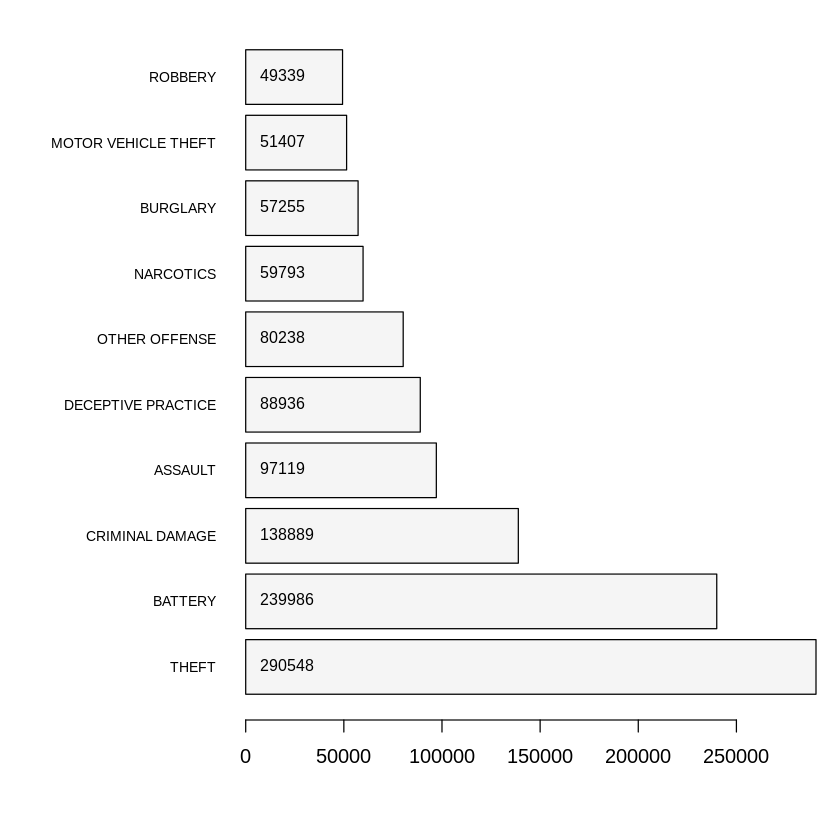

In [52]:
counts = table(crime$Primary.Type)

counts = counts[order(counts, decreasing=T)]
par(mar = c(5,10,1,1))

y = barplot(counts[1:10], horiz=T, las=1, cex.names=0.7, col="whitesmoke")

text(1000, y, counts[1:10], pos=4, cex=0.8)


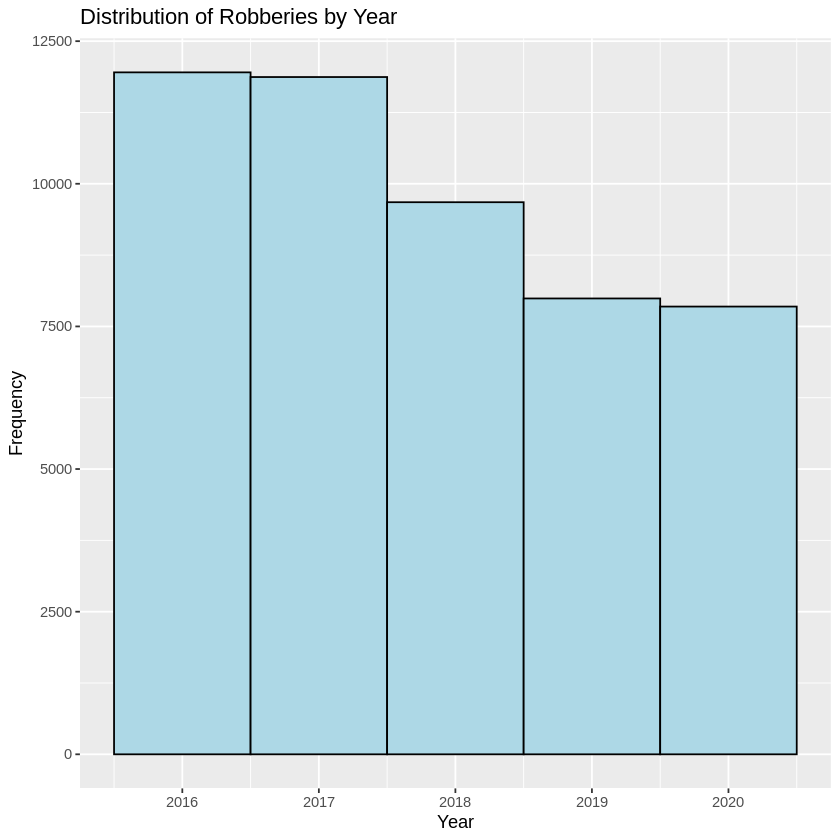

In [89]:
# Load necessary libraries
library(ggplot2)

# Subset data for robbery with Latitude > 41
robbery.all <- crime[(crime$Primary.Type == "ROBBERY") & (crime$Latitude > 41),]

# Create a histogram of the 'Year' variable
ggplot(robbery.all, aes(x = Year)) +
  geom_histogram(binwidth = 1, fill = "lightblue", color = "black") +
  ggtitle("Distribution of Robberies by Year") +
  xlab("Year") + ylab("Frequency")


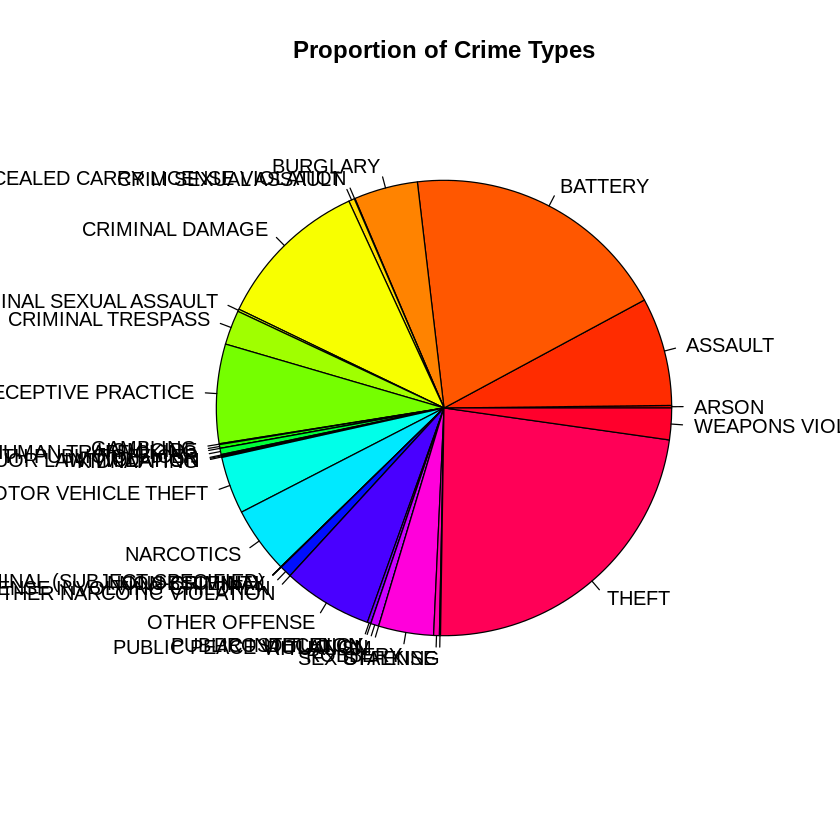

In [84]:
library(ggplot2)

# Aggregate the data by crime type
crime_type_count <- table(crime$Primary.Type)

# Create a pie chart
pie(crime_type_count, main = "Proportion of Crime Types", col = rainbow(length(crime_type_count)))



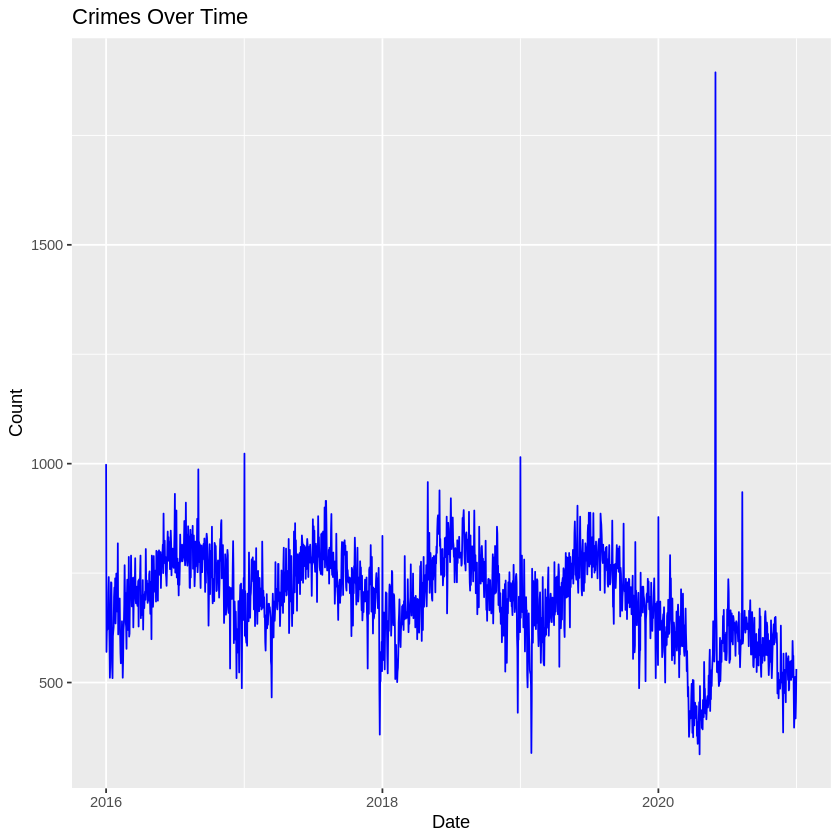

In [56]:
# Convert Date column to Date type
crime$Date <- as.Date(crime$Date, format = "%m/%d/%Y %H:%M")

# Create a timeline chart
ggplot(crime, aes(x = Date)) +
  geom_line(stat = "count", color = "blue") +
  labs(title = "Crimes Over Time", x = "Date", y = "Count")


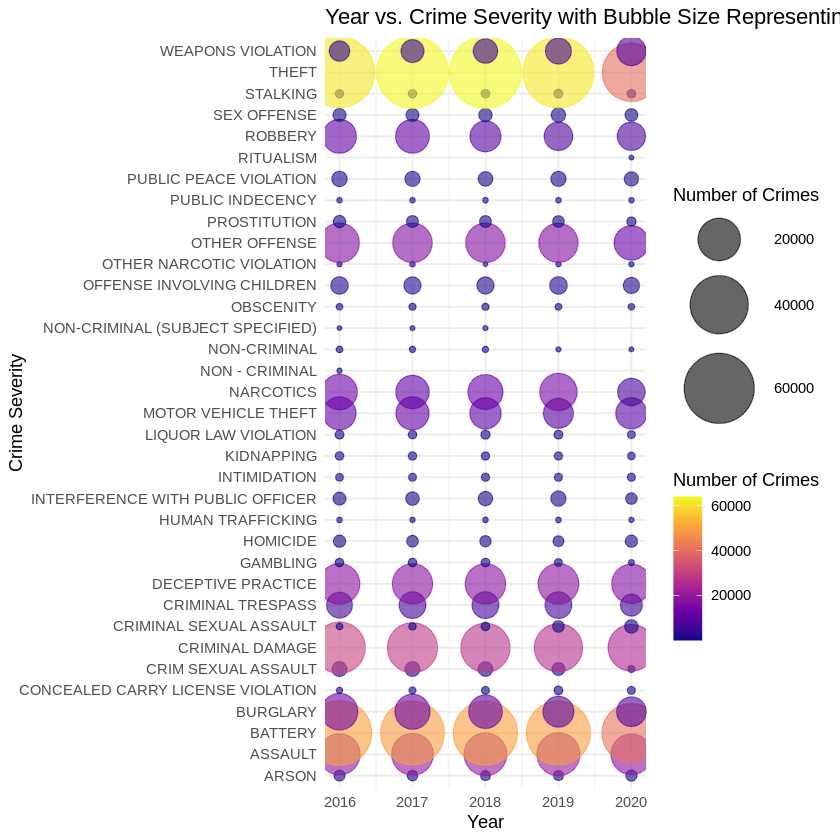

In [90]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Example data preparation: assuming you want to use 'Primary.Type' and 'Year'
# Aggregate the data by Year and Crime Severity (or another variable)
crime_summary <- crime %>%
  group_by(Year, Primary.Type) %>%
  summarize(Count = n(), .groups = 'drop')

# Create a bubble chart
ggplot(crime_summary, aes(x = Year, y = Primary.Type, size = Count, color = Count)) +
  geom_point(alpha = 0.6) +
  scale_size(range = c(1, 20), name = "Number of Crimes") +
  scale_color_viridis_c(option = "plasma", name = "Number of Crimes") +  # Use Viridis color scale
  ggtitle("Year vs. Crime Severity with Bubble Size Representing Number of Crimes") +
  xlab("Year") +
  ylab("Crime Severity") +
  theme_minimal()


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


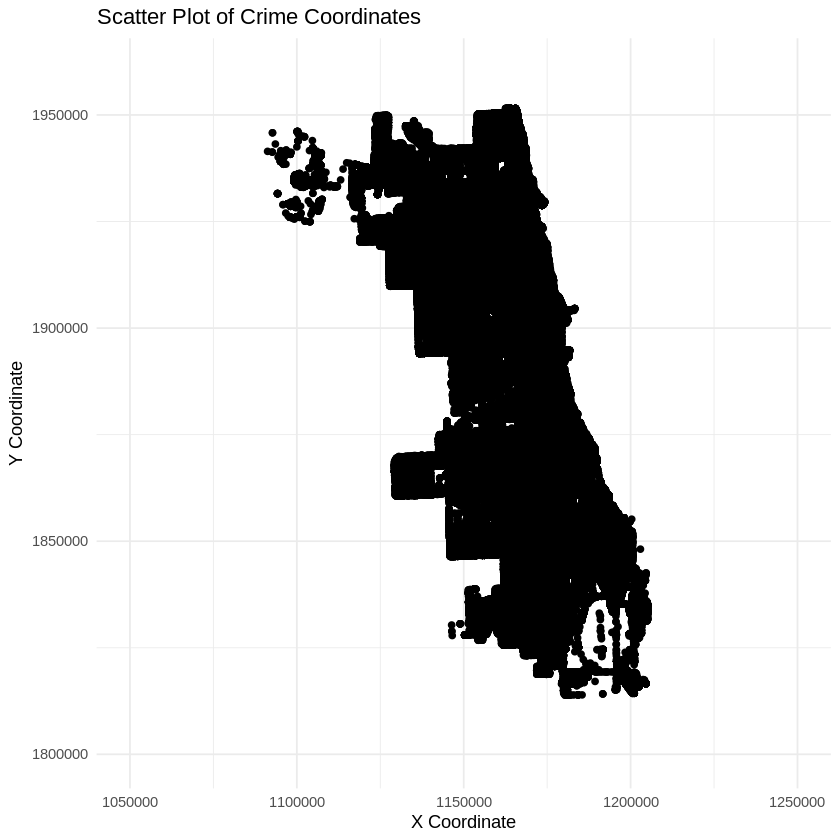

In [104]:

# Create a scatter plot with specified axis limits
ggplot(crime, aes(x = X.Coordinate, y = Y.Coordinate)) +
  geom_point() +
  labs(title = "Scatter Plot of Crime Coordinates",
       x = "X Coordinate",
       y = "Y Coordinate") +
  xlim(1050000, 1250000) +  # Set x-axis limits
  ylim(1800000, 1960000) +  # Set y-axis limits
  theme_minimal()
